### Exercise
Do your work for this exercise in a notebook named `explore.ipynb`. Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a `mean()` aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.
1. Using a human-based approach, split your dataset into train and test sets.
2. Visualize your train-test split.

Only use your train data set to perform the following tasks:

3. Resample your data and visualize it.
4. Creating a rolling (moving) average of your data and visualize it.
5. Plot the difference in sales from one day to the next.
6. Plot the % difference in sales from one day to the next.
6. Plot the % difference in sales from one week to the next.
7. Plot the % difference in sales from one month to the next.
8. Visualize an autocorrelation plot on a weekly resampling.
9. Visualize a seasonal decomposition plot on a weekly resampling.

### OPS data
Load your OPS data using your acquire and/or prepare functions.
1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

Only use the train data set to perform the following tasks:

2. Visualize your train-test split.
3. Plot the consumption, wind, and solar data on the same chart.
4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.
5. Resample the consumption data to monthly and plot it.
6. Resample the consumption data to yearly and plot it.

#### BONUS:
7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.
8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.
9. Create a subseasonal plot by month of your consumption data. 
10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?
11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?
12. Plot a time series decomposition for your consumption data and note your takeaways.
13. Create an autocorrelation plot of a weekly resampling of the consumption data.

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import prepare
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
%matplotlib inline

import seaborn as sns
plt.rc('figure', figsize=(13, 7))
# plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('fivethirtyeight')

import acquire
import prepare

In [2]:
df = acquire.get_store_data()
df.info()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete
<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0_x   913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   Unnamed: 0_y   913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_id        913000 non-null  int64  
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  Unnamed: 0     913000 non-null  int64  
 12  store_address  913000 non-null  object 
 13  store_city     913000 non-null  object 
 14  store_id       913000 non-null  i

In [3]:
df = prepare.prep_store_data(df)
df.head()

,quantity,sale_id,item_brand,item_id,item_name,item_price,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,San Antonio,8,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,San Antonio,9,TX,78221,1,2013,294.00


In [4]:
# look at max and min dates
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

In [5]:
# Train test split:

train = df[:'2016']
test = df['2017']

<AxesSubplot:xlabel='sale_date'>

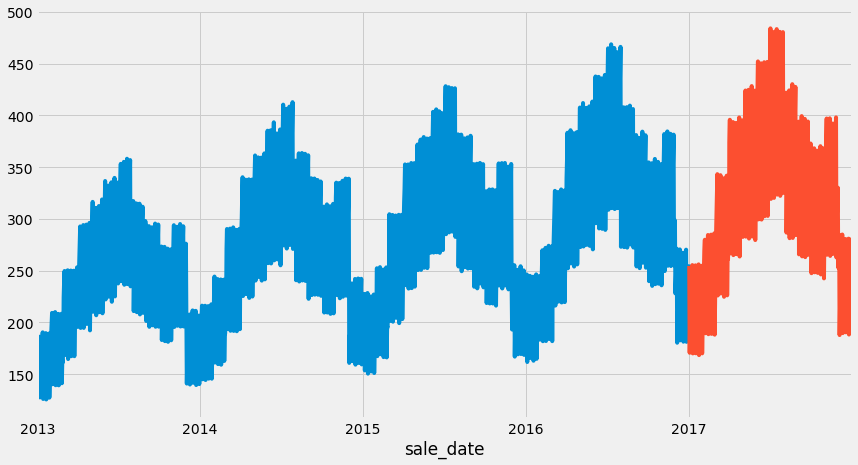

In [6]:
# Visualize the split data:

train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [7]:
# y is the resampled daily data:

y = train.resample('D').sales_total.mean()
y.head()

sale_date
2013-01-01 00:00:00+00:00    147.68802
2013-01-02 00:00:00+00:00    147.14116
2013-01-03 00:00:00+00:00    156.33896
2013-01-04 00:00:00+00:00    168.93546
2013-01-05 00:00:00+00:00    175.24370
Freq: D, Name: sales_total, dtype: float64

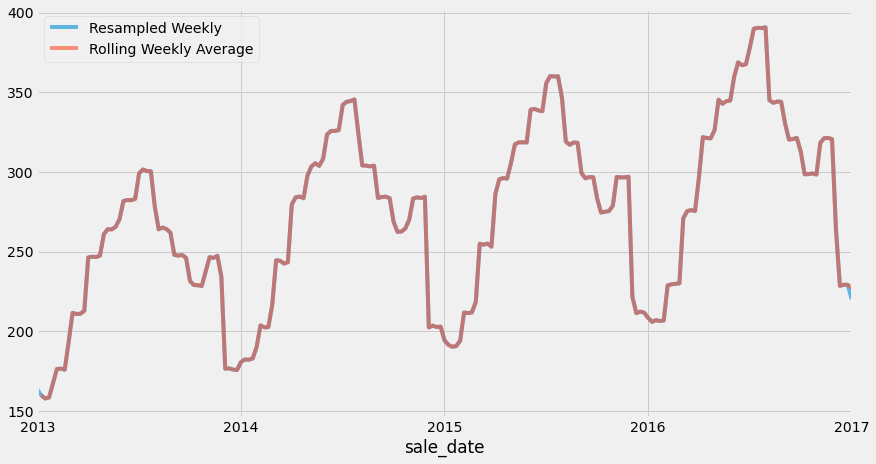

In [8]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

Text(0, 0.5, 'Difference in sales from one day to the next')

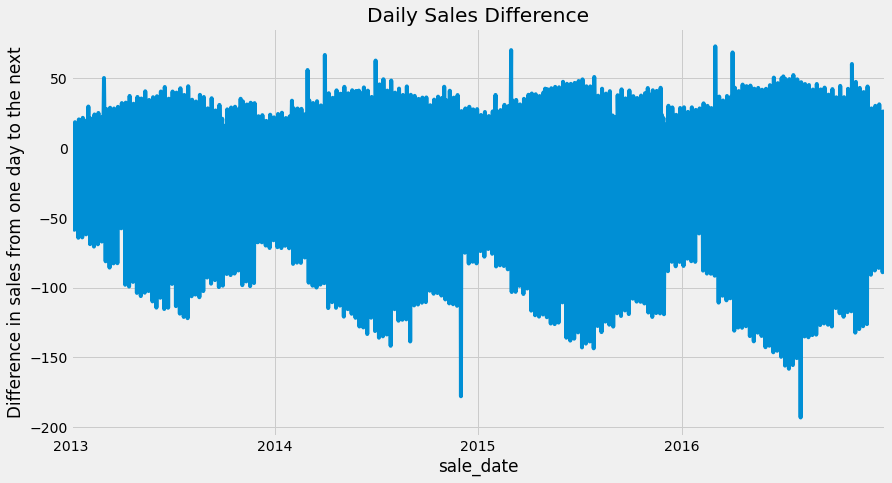

In [9]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

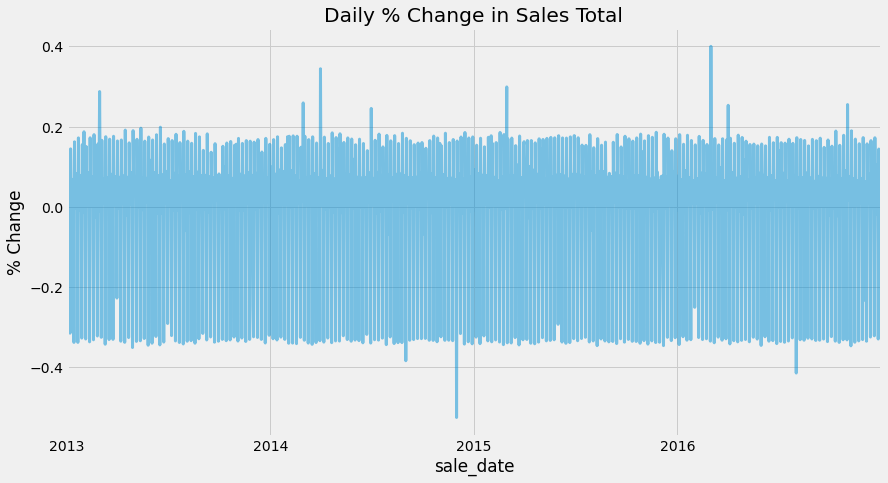

In [10]:
# Plot percent change

(y.diff() / y.shift()).plot(alpha=.5, lw=3)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

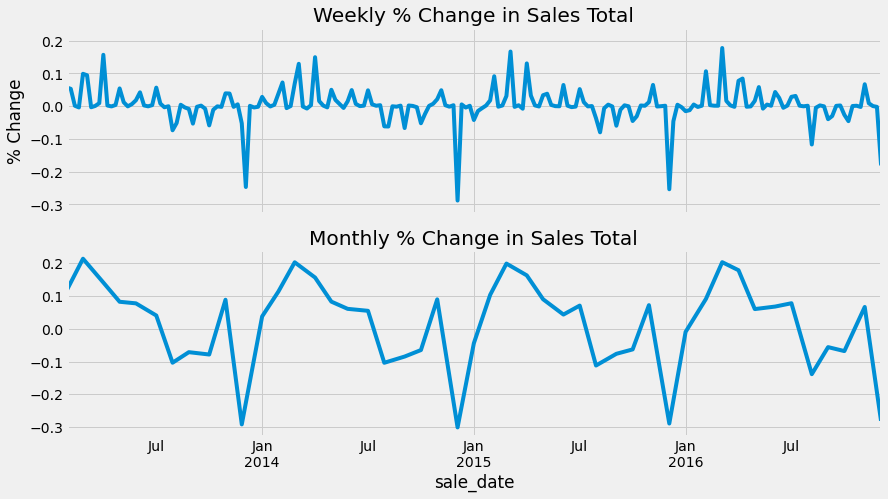

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())